## DATA ANALYTICS

It always starts with some imports

In [1]:
import pandas as pd
import seaborn as sns

## Loading a CSV into a DataFrame

In [2]:
listing_df = pd.read_csv("data/AB_NYC_2019.csv")

## Quick look at the data

In [3]:
listing_df.shape #tuple

(48895, 16)

In [4]:
listing_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [5]:
listing_df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [6]:
listing_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## Cleaning Data

### How many nulls

In [7]:
listing_df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

### Drop irrelevant columns

In [8]:
columns_to_drop = ['id', 'host_name', 'last_review']
listing_df.drop(columns_to_drop, axis="columns", inplace=True)
listing_df.shape

(48895, 13)

### Replace NaN with 0

In [9]:
listing_df.fillna({'reviews_per_month' : 0}, inplace=True)

## Filtering

#### We can filter Columns (by name)

In [11]:
listing_df['name']

0                       Clean & quiet apt home by the park
1                                    Skylit Midtown Castle
2                      THE VILLAGE OF HARLEM....NEW YORK !
3                          Cozy Entire Floor of Brownstone
4         Entire Apt: Spacious Studio/Loft by central park
                               ...                        
48890      Charming one bedroom - newly renovated rowhouse
48891        Affordable room in Bushwick/East Williamsburg
48892              Sunny Studio at Historical Neighborhood
48893                 43rd St. Time Square-cozy single bed
48894    Trendy duplex in the very heart of Hell's Kitchen
Name: name, Length: 48895, dtype: object

In [13]:
listing_df[['name', 'neighbourhood', 'price']]

,name,neighbourhood,price
0,Clean & quiet apt home by the park,Kensington,149
1,Skylit Midtown Castle,Midtown,225
2,THE VILLAGE OF HARLEM....NEW YORK !,Harlem,150
3,Cozy Entire Floor of Brownstone,Clinton Hill,89
4,Entire Apt: Spacious Studio/Loft by central park,East Harlem,80
...,...,...,...
48890,Charming one bedroom - newly renovated rowhouse,Bedford-Stuyvesant,70
48891,Affordable room in Bushwick/East Williamsburg,Bushwick,40
48892,Sunny Studio at Historical Neighborhood,Harlem,115
48893,43rd St. Time Square-cozy single bed,Hell's Kitchen,55


#### We can Rows (by index)

In [14]:
listing_df[5:15]

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
5,Large Cozy 1 BR Apartment In Midtown East,7322,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,0.59,1,129
6,BlissArtsSpace!,7356,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,0.40,1,0
7,Large Furnished Room Near B'way,8967,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,3.47,1,220
8,Cozy Clean Guest Room - Family Apt,7490,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,0.99,1,0
9,Cute & Cozy Lower East Side 1 bdrm,7549,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,1.33,4,188
10,Beautiful 1br on Upper West Side,7702,Manhattan,Upper West Side,40.80316,-73.96545,Entire home/apt,135,5,53,0.43,1,6
11,Central Manhattan/near Broadway,7989,Manhattan,Hell's Kitchen,40.76076,-73.98867,Private room,85,2,188,1.50,1,39
12,"Lovely Room 1, Garden, Best Area, Legal rental",9744,Brooklyn,South Slope,40.66829,-73.98779,Private room,89,4,167,1.34,3,314
13,Wonderful Guest Bedroom in Manhattan for SINGLES,11528,Manhattan,Upper West Side,40.79826,-73.96113,Private room,85,2,113,0.91,1,333
14,West Village Nest - Superhost,11975,Manhattan,West Village,40.73530,-74.00525,Entire home/apt,120,90,27,0.22,1,0


## Boolean indexing

#### Using this Series as an selection index

In [15]:
listing_df['price'] < 100

0        False
1        False
2        False
3         True
4         True
         ...  
48890     True
48891     True
48892    False
48893     True
48894     True
Name: price, Length: 48895, dtype: bool

In [16]:
listing_df[listing_df['price'] < 100]

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
3,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
6,BlissArtsSpace!,7356,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,0.40,1,0
7,Large Furnished Room Near B'way,8967,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,3.47,1,220
8,Cozy Clean Guest Room - Family Apt,7490,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,0.99,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48889,QUIT PRIVATE HOUSE,107716952,Queens,Jamaica,40.69137,-73.80844,Private room,65,1,0,0.00,2,163
48890,Charming one bedroom - newly renovated rowhouse,8232441,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0.00,2,9
48891,Affordable room in Bushwick/East Williamsburg,6570630,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,0.00,2,36
48893,43rd St. Time Square-cozy single bed,30985759,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,0.00,6,2


## Exploratory Data analysis

Let's start asking some questions to our dataset !

### 🤔 What are the 10 most reviewed Flats?

In [17]:
listing_df.nlargest(10, 'number_of_reviews')

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
11759,Room near JFK Queen Bed,47621202,Queens,Jamaica,40.66730,-73.76831,Private room,47,1,629,14.58,2,333
2031,Great Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,607,7.75,3,293
2030,Beautiful Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82124,-73.93838,Private room,49,1,597,7.72,3,342
2015,Private Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82264,-73.94041,Private room,49,1,594,7.57,3,339
13495,Room Near JFK Twin Beds,47621202,Queens,Jamaica,40.66939,-73.76975,Private room,47,1,576,13.40,2,173
10623,Steps away from Laguardia airport,37312959,Queens,East Elmhurst,40.77006,-73.87683,Private room,46,1,543,11.59,5,163
1879,Manhattan Lux Loft.Like.Love.Lots.Look !,2369681,Manhattan,Lower East Side,40.71921,-73.99116,Private room,99,2,540,6.95,1,179
20403,Cozy Room Family Home LGA Airport NO CLEANING FEE,26432133,Queens,East Elmhurst,40.76335,-73.87007,Private room,48,1,510,16.22,5,341
4870,Private brownstone studio Brooklyn,12949460,Brooklyn,Park Slope,40.67926,-73.97711,Entire home/apt,160,1,488,8.14,1,269
471,LG Private Room/Family Friendly,792159,Brooklyn,Bushwick,40.70283,-73.92131,Private room,60,3,480,6.70,1,0


### 🤔 What are the NY neighourhood groups with Flats?

In [18]:
listing_df['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

### 🤔 Follow-up: How many flats per neighbourhood group?

In [21]:
listing_df['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

### 🤔 What are the Top 10 neighbourhoods with Airbnb flats?

In [22]:
listing_df['neighbourhood'].value_counts().head(10)

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64

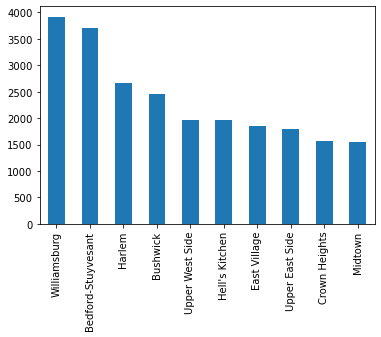

In [23]:
listing_df['neighbourhood'].value_counts().head(10).plot(kind='bar')

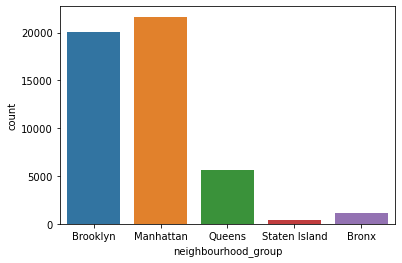

In [24]:
sns.countplot(data=listing_df, x='neighbourhood_group')

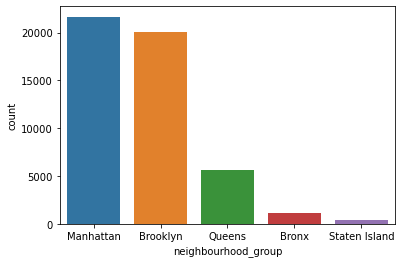

In [25]:
order = listing_df['neighbourhood_group'].value_counts().index
sns.countplot(data=listing_df, x='neighbourhood_group', order=order)

### 🤔 What's the influence neighbourhood group on room type?

In [26]:
listing_df['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

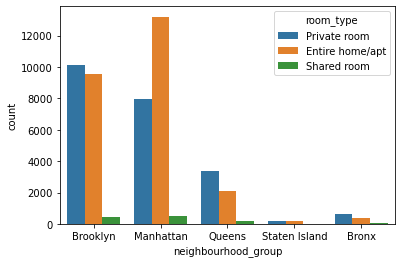

In [27]:
sns.countplot(data=listing_df, x='neighbourhood_group', hue="room_type")

### 🤔 What is the distribution of flat prices?

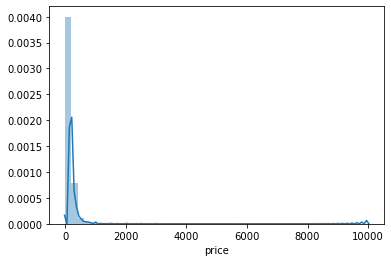

In [29]:
sns.distplot(listing_df['price'])

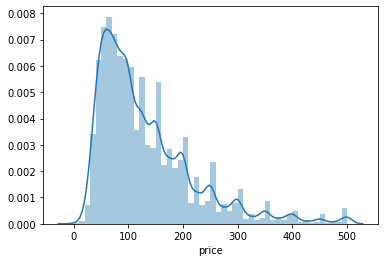

In [30]:
affordable_df = listing_df[listing_df['price'] <= 500]
sns.distplot(affordable_df['price'])

In [31]:
affordable_df.price.mean()

131.53056362458466

### 🤔 What is the distribution of flat prices based on the Neighbourhood Group?

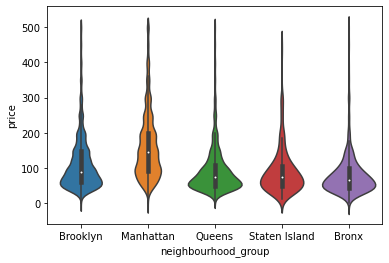

In [32]:
sns.violinplot(data=affordable_df, x='neighbourhood_group', y='price')

### 🤔 Can we plot the Flats on a map?

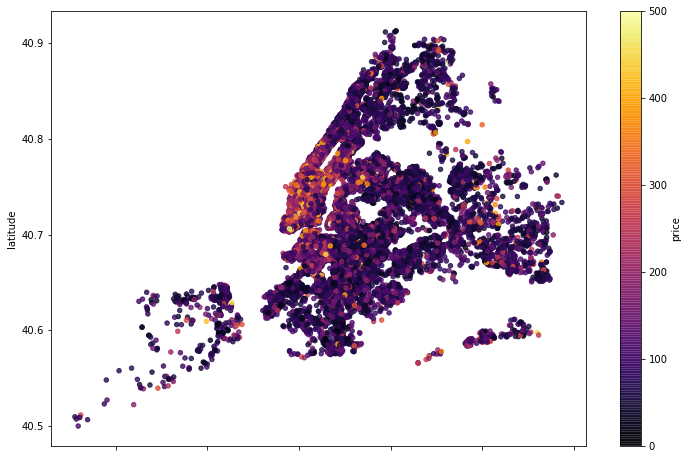

In [33]:
affordable_df.plot(
    kind='scatter',
    x='longitude',
    y='latitude',
    c='price',
    cmap='inferno',
    colorbar=True,
    alpha=0.8,
    figsize=(12,8))

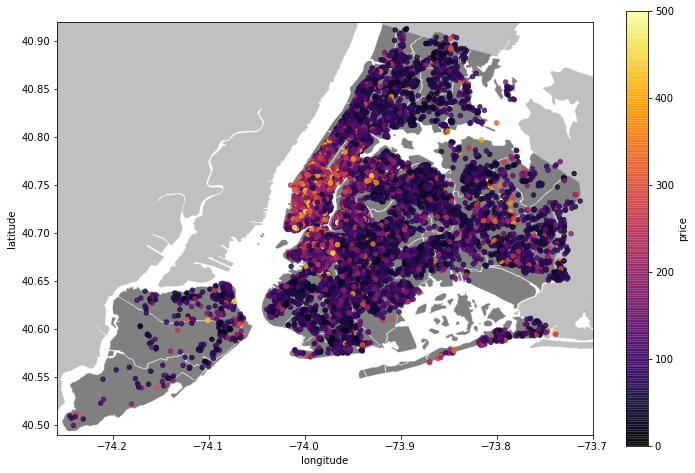

In [35]:
import matplotlib.pyplot as plt
import urllib
i = urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
plt.imshow(plt.imread(i), zorder=0, extent=[-74.258, -73.7, 40.49, 40.92])
ax = plt.gca()
affordable_df.plot(
    ax=ax,
    zorder=1,
    kind='scatter',
    x='longitude',
    y='latitude',
    c='price',
    cmap='inferno',
    colorbar=True,
    alpha=0.8,
    figsize=(12,8))